In [47]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import h5py
import matplotlib.pyplot as plt

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',input_shape=(150,150,3)))#896=3*3*32*3+32
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64 ,(3,3), activation='relu'))#18496=3*3*64*32+64
model.add(layers.MaxPool2D((2,2,)))
model.add(layers.Conv2D(128,  (3,3),activation='relu'))#73856=3*3*128*64+128
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())#6272
model.add(layers.Dense(512, activation='relu'))#6272*512
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [69]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gennerator = train_datagen.flow_from_directory(
        '/home/a/Downloads/cats_and_dogs_small/train',
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

validation_gennerator = train_datagen.flow_from_directory(
        '/home/a/Downloads/cats_and_dogs_small/validation',
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

test_gennerator = test_datagen.flow_from_directory('/home/a/Downloads/cats_and_dogs_small/test',
                                                  target_size=(150,150),
                                                    batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [67]:
# # print(train_gennerator[0][0][0])
# print(type(train_gennerator))
# print(type(train_gennerator[0][0]))
# print(train_gennerator[0][0].shape)
# print(train_gennerator[0][0][0].reshape((450,150)))

print(test_gennerator[0][0].shape)

(20, 150, 150, 3)


In [1]:
plt.imshow(train_gennerator[0][0][0,:,:,0].reshape((450,150)),cmap=plt.cm.binary)


NameError: name 'plt' is not defined

In [58]:
history = model.fit_generator(train_gennerator,steps_per_epoch=100,epochs=30, 
                              validation_data=validation_gennerator,
                             validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 101s 1s/step - loss: 0.6500 - acc: 0.6105 - val_loss: 0.6537 - val_acc: 0.5810
Epoch 2/30
100/100 [==============================] - 97s 968ms/step - loss: 0.6166 - acc: 0.6595 - val_loss: 0.6549 - val_acc: 0.6120
Epoch 3/30
100/100 [==============================] - 97s 966ms/step - loss: 0.5754 - acc: 0.6895 - val_loss: 0.5940 - val_acc: 0.6780
Epoch 4/30
100/100 [==============================] - 97s 969ms/step - loss: 0.5403 - acc: 0.7325 - val_loss: 0.5792 - val_acc: 0.6960
Epoch 5/30
100/100 [==============================] - 95s 954ms/step - loss: 0.5081 - acc: 0.7435 - val_loss: 0.6183 - val_acc: 0.6720
Epoch 6/30
100/100 [==============================] - 96s 955ms/step - loss: 0.4780 - acc: 0.7660 - val_loss: 0.5863 - val_acc: 0.6960
Epoch 7/30
100/100 [==============================] - 103s 1s/step - loss: 0.4536 - acc: 0.7910 - val_loss: 0.6213 - val_acc: 0.6580
Epoch 8/30
100/100 [==============================] - 103s 

In [59]:
model.save('cats_and_dogs_small.h5')

In [72]:
# prediction = model.predict()
test_loss,test_acc = model.evaluate_generator(test_gennerator)

In [73]:
print(test_loss,test_acc)

1.1036379742622375 0.6969999980926513


In [75]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)



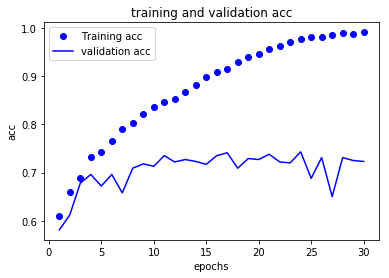

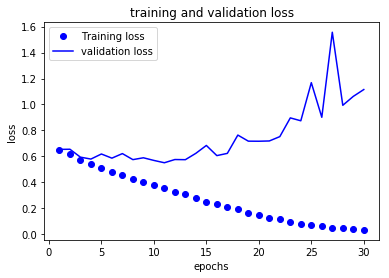

In [77]:
plt.plot(epochs, acc,'bo', label='Training acc')
plt.plot(epochs, val_acc,'b', label='validation acc')
plt.title('training and validation acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss,'b', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()
